## Practical exercises. Part II

### Andrey Kravtsov

### The University of Chicago 

### email: kravtsov@uchicago.edu

In [10]:
# Preliminaries: set up plotting parameters
import numpy as np

# setup notebook for inline figures
%matplotlib inline
import matplotlib.pyplot as plt

# setup matplotlib parameters to make nicer plots
from codes.plot_utils import plot_pretty

### Exercise I: from total mass accretion rate to a simple galaxy formation model 

Starting with approximation to simulation results for the total mass accretion rate, $\dot{M}$, as a function of object mass and time $t$ either taken directly from simulation or parametrized by an analytical model (e.g., such as those discussed in <a href="l01_peak_profile_MAH.ipynb">lecture 1</a> and the first practical exercise in <a href="ex01.ipynb">ex01</a> notebook).  

### Accretion rate of baryons

Let's assume that this total mass accretes onto galaxy as a mix of dark matter and diffuse baryon plasma (gas), with a mass fraction of baryons, $f_{\rm b,acc}$, so that baryon mass accretion rate is: 

$$\dot{M}_{\rm b,acc}= f_{\rm b,acc}\,\dot{M}=f_{\rm b,uni}\,f_{\rm b,in}\dot{M},
$$

where $f_{\rm b,uni}=\Omega_{\rm b}/\Omega_{\rm m}$ is "universal" baryon fraction (i.e., average over universe), which reflects the fact that overall baryons constitute a fraction of mass smaller or equal to this fraction. 

The factor $f_{\rm b,in}$ parametrizes possible enhancement or suppression of baryon accretion due to some physical process. 

### A simple "barebones" galaxy formation model

Assume that 1) baryons are accreted with universal baryon fraction (i.e., $f_{\rm b,in}=1$) in the form of gas and 2) after accretion this gas is delivered instantly to the interstellar medium 

$$
\begin{cases}
\dot{M}_{\rm g, ISM}= f_{\rm b,uni}\,f_{\rm b,in}\dot{M} - (1-\mathcal{R})\,\dot{M}_\star,\\
\dot{M}_\star =\frac{M_{\rm g, iSM}}{\tau_{\rm sf}} , \\
\end{cases}$$

where $\tau_{\rm sf}$ is *gas depletion time scale* on which ISM gas is converted into stars; in this simple model we will simply assume that $\tau_{\rm sf}=\rm const$. 

$\mathcal{R}$ is the fraction of newly formed stars that is returned back into the ISM via winds and supernovae explosions (we are assuming that this occurs instantly, using so-called *"instantaneous recycling approxination"*). The value of $\mathcal{R}$ depends on the initial mass function (IMF) of stars; we will assume a constant value characteristic of typical observed IMF: $\mathcal{R}=0.46$.

These equations can be numerically integrated as a system of ODEs. Such integration is implemented in <a href="codes/galaxy_model.py"><tt>codes/galaxy_model.py</tt></a> in python class <tt>simplest_model</tt>. 

**Task 1.** Examine python class <tt>simplest_model</tt> in file <a href="codes/galaxy_model.py"><tt>codes/galaxy_model.py</tt></a> and try to map the above model equations to different parts of the class and its functions (routines). Much of the code in the beginning is simple initialization and some parameter checking. The initialization routine is followed by functions implementing different terms of the above equations. 

The core routine is <tt>evolve</tt>, which is defining the time derivatives for the variables, $\dot{M}$, $\dot{M}_{\rm g,ISM}$, $M_\star$, which will be supplied to an ODE solver. In the code I will use  <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html">scipy's <tt>odeint</tt></a> routine for numerical solution of ODE system. 

Note that the current code is using my own approximation to accretion time scale (exercise, Part I): $M/\dot{M}=0.175\, t^{1.8} (M/10^{12}\, M_\odot)^{-0.1}$ to simulation results in the function <tt>dMhdt</tt>. If you came up with your own approximations in Part I yesterday, you can try implementing it in that function instead. In this case, not that <tt>Minit</tt> value you may need to use to get a given final mass may be different. 

In [11]:
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
wmap_bolshoi_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.0469, 'sigma8': 0.82, 'ns': 0.95}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('wmap_bolshoi_cosmo', wmap_bolshoi_cosmo)
cosmo.interpolation = True


In [12]:
# define grid of redshifts at which to compute evolution model values
zmax=20.; zmin=0.; nzb = 100
zg = np.linspace(zmax, zmin, nzb) # grid of redshifts
t_output = cosmo.age(zg) # and corresponding times

In [13]:
plot_pretty(dpi=200)

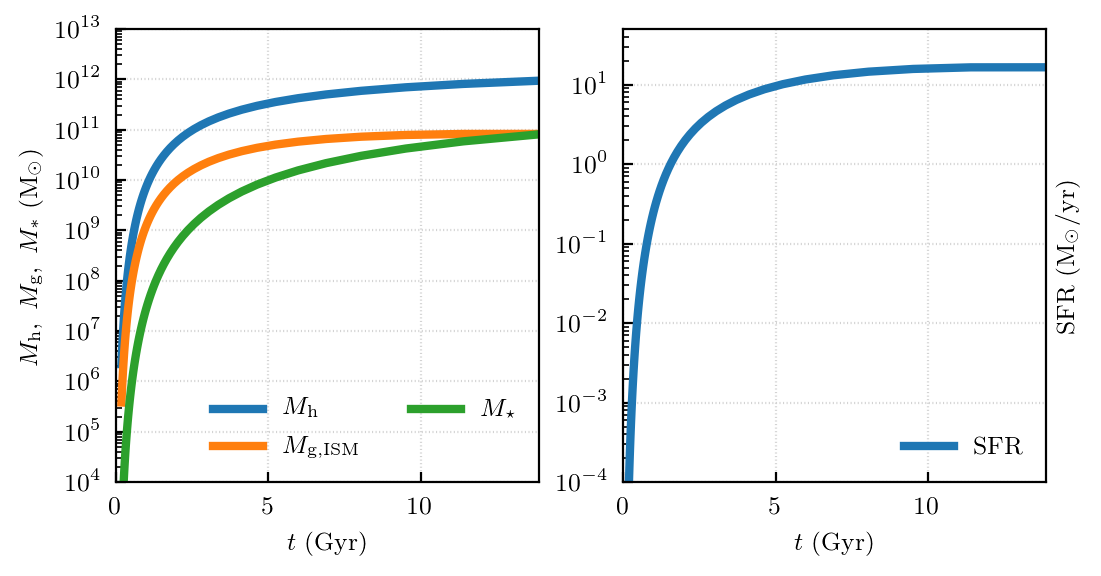

In [14]:
import codes.galaxy_model as gm

# initial halo mass at initial redshift (zmax)
Minit = 2.2e6

# set up dictionary of parameters to pass to the model
# star formation model gaslinear is simply SFR=Mgas(t)/tau, where [tau]=[Gyrs] is constant 
# tausf is gas consumption time scale in Gyrs
kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 5}

t_output, Mout = gm.simplest_model.test_galaxy_evolution(gmodel=gm.simplest_model, Minit=Minit, t_output=t_output,  
                                                                 kwargs=kwargs)
gm.simplest_model.plot_test_evolution(Mout, gmodel=gm.simplest_model, t_output=t_output, 
                                      kwargs=kwargs, savefig=None)


**Task 2.** Run the code below, which produces a single evolutionary track of a model galaxy starting with a given initial mass <tt>Minit</tt> at initial redshift (defined as <tt>zmax</tt> in the code below and plots solutions for $M(t)$, $M_{\rm g,ISM}(t)$, $M_\star(t)$ (left panel) and star formation rate (SFR), $\dot{M}_\star$ (right panel).

Examine the evolutionary tracks for <tt>Minit=2.2e6</tt>, which gives $M(z=0)\approx 10^{12}\, M_\odot$. In particular, how the form of $M_{\rm g, ISM}(t)$ and $M_\star(t)$ as a function of time compares to the mass assembly history (MAH) of all mass, $M(t)$. Explain this form qualitatively in terms of the physical model for MAH based on the initial density profile, $\delta(<r)$, of the peak considered in lecture 2 (see <a href="l02_MAH_model.ipynb">notebook</a>). In particular, what determines the steep part (rapid increase) and shallow part (slow increase) of gas and stellar mass at early and late times.

Compare the final $M_{\rm g}$ and $M_\star$ at $z=0$ ($t\approx 13.8$ Gyrs) predicted by the model to the values estimated for the Milky Way in observations: $M_{\rm ISM, MW}\approx 10^{10}\, M_\odot$, $M_{\star,\rm MW}\approx 6\times 10^{10}\, M_\odot$, and star formation rate, $\dot{M}_{\star,\rm MW}\approx 1-2\, M_\odot/\rm yr$. How different are predictions of the model compared to these values for object with the final total mass of $M\approx 10^{12}\, M_\odot$? 

Examine behavior for other values of initial mass <tt>Minit</tt>. Is evolution for other masses similar or different?


**Task 3.** Try running the model with values of $\tau_{\rm sf}$ (parameter <tt>tausf</tt> of the model, which is in Gyrs) than the default $5$ Gyrs assumed here. Can predictions be reconciled with the Milky Way values by a different $\tau_{\rm sf}$ value? 

**Task 4.** The code below shows predictions of this simple model for the relation between stellar mass of the galaxy and the total collapsed mass of matter within its halo: the $M_\star-M$ relation. 

Comment on the overall form of the relation and its evolution with redshift and why do you think it has the form it has and why it evolves the way it does. Try to examine the evolution for different values of $\tau_{\rm sf}$ by re-running the model, as in Task 3 above. 

In [15]:
def fB13(x, alfa, delta, gamma):
    m10x = np.minimum(10.**(-x), 100.)
    dummy = -np.log10(10.**(alfa*x)+1.) + delta*(np.log10(np.exp(x)+1.))**gamma/(1.+np.exp(m10x))
    return dummy

def MsMh_B13form(lMvir, lM1, leps, alfa, delta, gamma):
    lMsB13 = leps + lM1 + fB13(lMvir-lM1,alfa, delta, gamma) - fB13(0., alfa, delta, gamma)
    return lMsB13

In [16]:
s = 0. # assume AM with no scatter
lM1 = 11.39; leps = -1.685; alfa = -2.2; delta = 4.335; gamma = 0.531

# alfa dependence on scatter from G-K17
alfa = -(0.14*s**2 + 0.14*s - alfa)

plot_pretty(dpi=200)

def plot_mhms(lMmin, lMmax, nMb, cosmo, lMhi, lMsi, plot_am=False, savefig=None):

    lMh = np.linspace(lMmin, lMmax, nMb)

    Mh  = np.power(10, lMh)

    fig = plt.figure(figsize=(2.5, 2.5))
    plt.xlabel(r'$M_h\ \rm (M_\odot)$')
    plt.ylabel(r'$M_{\star}\ \rm (M_\odot)$')
    plt.xlim(1.e7,1.e15); plt.ylim(1.e3,1.e13)
    plt.xscale('log'); plt.yscale('log')

    lMhlin = np.linspace(6., 16, 100); Mhlin = 10.**lMhlin
    Mslin = Mhlin * cosmo.Ob0/cosmo.Om0
    plt.plot(Mhlin, Mslin, ':', c='gray', lw=1.5, label=r'$\Omega_{\rm b}/\Omega_{\rm m}\, M_{\rm h}$')

    z_plot = np.array([0., 2.2, 3.5, 6.0])
    # colors a la Feldmann for easier comparison
    zcolors = ['green', 'red', 'blue', 'darkgray']
    for i, zplot in enumerate(z_plot):
        Mhz = 10.**lMhi(np.log10(1.0+zplot),lMh)
        Msz = 10.**lMsi(np.log10(1.0+zplot),lMh)
        plt.plot(Mhz, Msz, c=zcolors[i], lw=2.5, label=r'$z=%1.1f$'%zplot)

    if plot_am: 
        lmhs = np.linspace(7., 15., 100)
        lmsmh = MsMh_B13form(lmhs, lM1, leps, alfa, delta, gamma)
        plt.plot(10.**lmhs, 10.**lmsmh, c='darkorange', lw=2.5, label=r'$z=0\ \rm AM$')

    plt.legend(frameon=False,loc='lower right', fontsize=7)
    plt.grid(linestyle='dotted', c='lightgray')
    if savefig is not None:
        plt.savefig(savefig, bbox_inches='tight')
    plt.show()


evolving mass grid...


C:\Users\h2_sf\Documents\Classes\1907_sochi_school\astrosochi19\codes\galaxy_model.py:106: RuntimeWarning: overflow encountered in double_scalars
  mdot = Mcurrent / tau_acc
C:\Users\h2_sf\Documents\Classes\1907_sochi_school\astrosochi19\codes\galaxy_model.py:143: RuntimeWarning: invalid value encountered in double_scalars
  dummy = self.Mgin - self.Rloss1 * self.sfr
C:\Users\h2_sf\AppData\Roaming\Python\Python37\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


done.


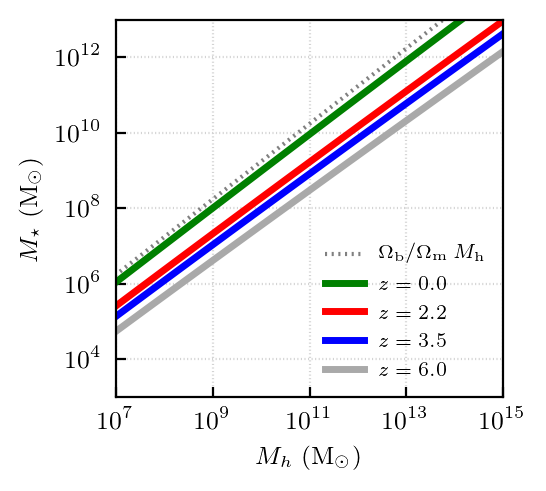

In [17]:
lMmin = 4.; lMmax = 8.0; Nmb = 100

lMh = np.linspace(lMmin, lMmax, Nmb)

# this routine will compute a 2d grid of models with initial log10 of halo masses in the range [lMmin, lMmax]
# with Nmb bins and time epochs given by t_output
# it returns 2d cubic spline objects that are set up to take log10(1.+z) and log10(Minit) and output
# halo mass, gas mass, and stellar mass for that z and Minit

kwargs = { 'cosmo': cosmo, 'sfrmodel': 'gaslinear', 'tausf': 5}

lMhi, lMgi, lMsi = gm.simplest_model.compute_mass_grid(gmodel = gm.simplest_model, lMhig=lMh, t_output=t_output, 
                                                   kwargs=kwargs)
plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi)

**Task 5.** Examine plot below $M_\star-M_{\rm h}$ relation obtained from various measurements of stellar masses of galaxies and total masses of halos and from the so-called "Abundance matching" (AM) - i.e., matching volume number density of galaxies as a function of stellar mass and volume number density of halos as a function of halo mass along with observational constraints (<a href="http://adsabs.harvard.edu/abs/2018AstL...44....8K">Kravtsov et al. 2018</a>)
Note any differences between this relation and the relation predicted by the model. You can overplot the "observed" relation, by specifying <tt>plot_am=True</tt> parameter for <tt>plot_mhms</tt> routine, as shown below. 

<center>
<img width="700" align="center" src="img/msmh_am_data_k18.PNG"></img>
</center>


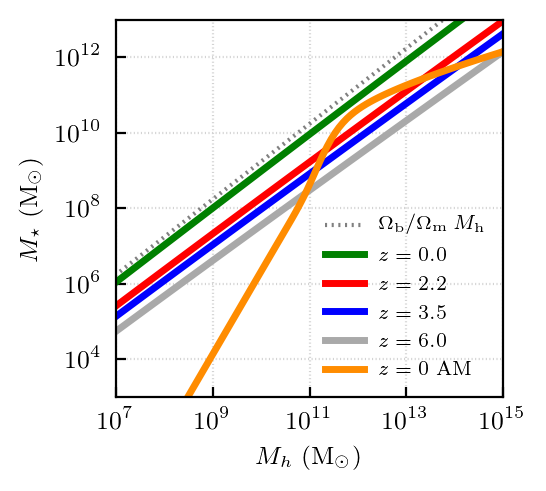

In [18]:
plot_mhms(lMmin, lMmax, Nmb, cosmo, lMhi, lMsi, plot_am=True)